In [1]:
import numpy as np
from scipy.io import loadmat
from PIL import Image, ImageOps
from typing import Union

# Understanding images needed for training object segmentation

In [2]:
def open_image_from_path(path: str, convert_to_grayscale=False):
    img = Image.open(path)
    if convert_to_grayscale:
        img = ImageOps.grayscale(img)
    return img


def get_img_stats(img):
    if isinstance(img, np.ndarray):
        img_data = Image.fromarray(img)
    else:
        img_data = np.asarray(img)

    s = f"""
        type is: {type(img_data)} \n
        shape is: {img_data.shape}\n
        """
    print(s)


def preview_img(img):
    if isinstance(img, np.ndarray):
        return Image.fromarray(img)
    else:
        return img



## Understanding authors training & annotation data

* authors training image is 3 channels
* image is jpg


        type is: <class 'numpy.ndarray'> 

        shape is: (512, 683, 3)

        


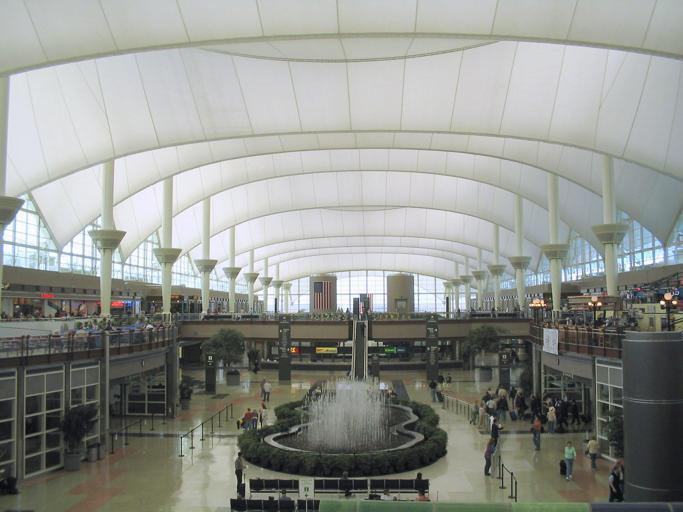

In [3]:
trg = '/Users/luqman/Downloads/ADEChallengeData2016/images/training/ADE_train_00000001.jpg'

train_img = open_image_from_path(trg)

get_img_stats(train_img)
preview_img(train_img)

* authors annotation image is 1 channel, same size as training image
* image is png


        type is: <class 'numpy.ndarray'> 

        shape is: (512, 683)

        


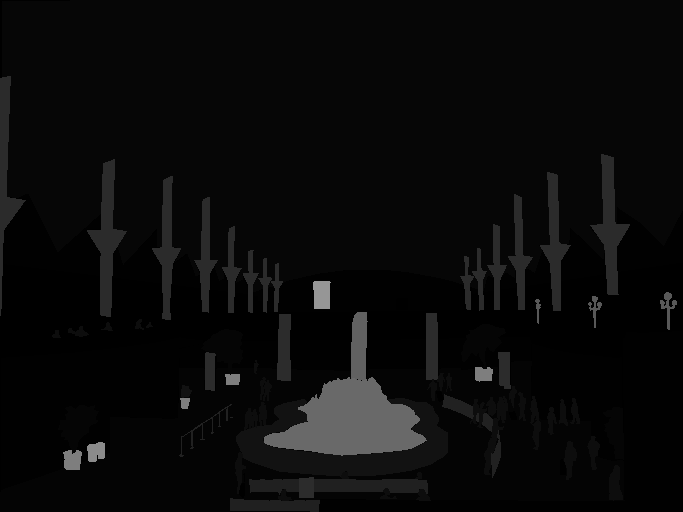

In [4]:
annot = '/Users/luqman/Downloads/ADEChallengeData2016/annotations/training/ADE_train_00000001.png'

annot_img = open_image_from_path(annot)

get_img_stats(annot_img)
preview_img(annot_img)

### Check the max values of each row in the annotation image

In [5]:
annot_img_data = np.asarray(annot_img)
np.max(annot_img_data, axis=1)

array([  6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,
        43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  43,  4

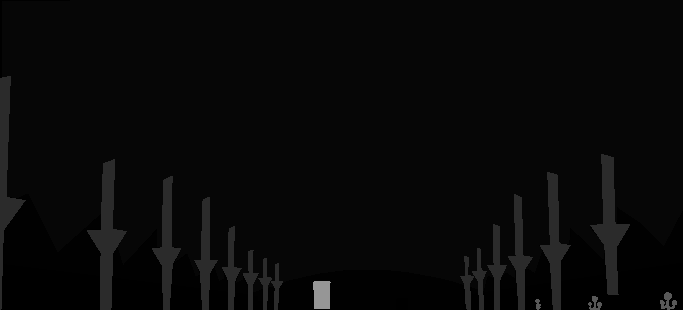

In [6]:
preview_img(annot_img_data[:310])

Visually: 
* cant see Pixel value 6 
* can see Pixel value 43 
* value 150 is the clearest whitish-gray

Each pixel value represents a class as stated in [object150_info.csv](../data/object150_info.csv). Pixel value 0 is an empty class.

## Understanding our own training & annotation data

* Why is our training image 4 channels??


        type is: <class 'numpy.ndarray'> 

        shape is: (510, 382, 4)

        


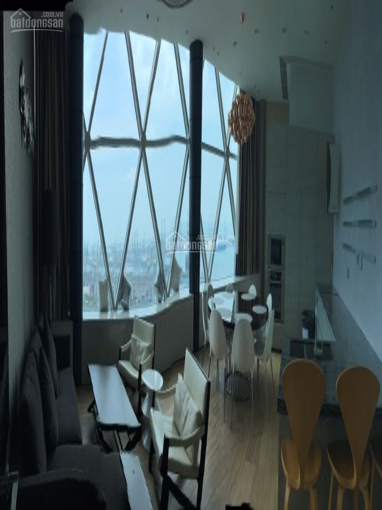

In [7]:
real_train_path = '../watermark_data/vietnam/images/training/batdongsan_1.jpg'

real_train_img = open_image_from_path(real_train_path)

get_img_stats(real_train_img)
preview_img(real_train_img)

### Fix Image: Make image from 4 channels to 3 channels

In [8]:
real_train_data = np.asarray(real_train_img)
print(real_train_data.shape)
real_train_data = real_train_data[:,:,:3]
print(real_train_data.shape)

(510, 382, 4)
(510, 382, 3)


Check that nothing (esp the watermark) is lost visually...

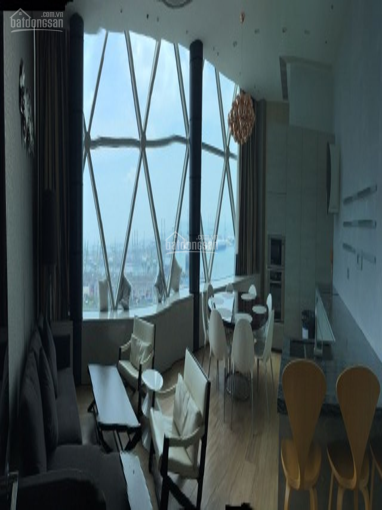

In [9]:
preview_img(real_train_data)

save the image

In [10]:
def save_image_from_array(x: np.ndarray, path: str):
    img = Image.fromarray(x)
    img.save(path)

In [11]:
save_image_from_array(real_train_data, "../watermark_data/vietnam/images/training/batdongsan_1_luq.jpg")


### Checking our annotation data

* Why is this 3 channels?


        type is: <class 'numpy.ndarray'> 

        shape is: (510, 382, 3)

        


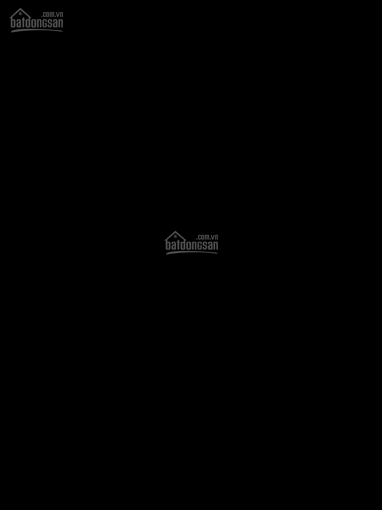

In [12]:
annot_train_path = '../watermark_data/vietnam/annotations/training/batdongsan_1.png'

annot_train_img = open_image_from_path(annot_train_path)

get_img_stats(annot_train_img)
preview_img(annot_train_img)

### Fix Image: Make image from 3 channels to 1 channel


        type is: <class 'numpy.ndarray'> 

        shape is: (510, 382)

        


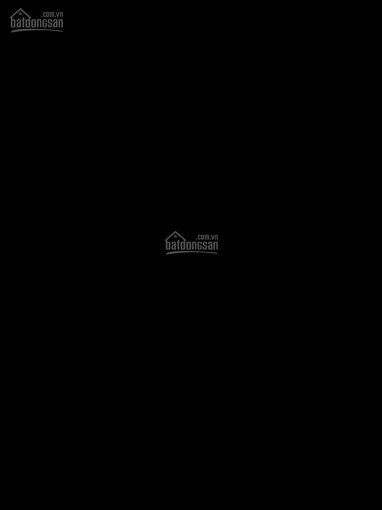

In [13]:
annot_train_path = '../watermark_data/vietnam/annotations/training/batdongsan_1.png'

annot_train_img = open_image_from_path(annot_train_path, convert_to_grayscale=True)

get_img_stats(annot_train_img)
preview_img(annot_train_img)

Check the values in our grayscale image and make sure its a single value (it is not!)

In [14]:
annot_train_data = np.asarray(annot_train_img)
np.max(annot_train_data, axis=1)


array([ 0,  0,  0,  0,  0,  0,  0,  6, 72, 84, 86, 86, 86, 85, 81, 82, 73,
       85, 85, 83, 87, 86, 85, 85, 85, 87, 86, 41, 15, 83, 87, 85, 29,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [21]:
for i, _ in enumerate(annot_train_data):
    for j, _ in enumerate(annot_train_data[i]):
        if annot_train_data[i][j] > 0:
            annot_train_data[i][j] = 1

Check...

In [22]:
np.max(annot_train_data, axis=1)


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

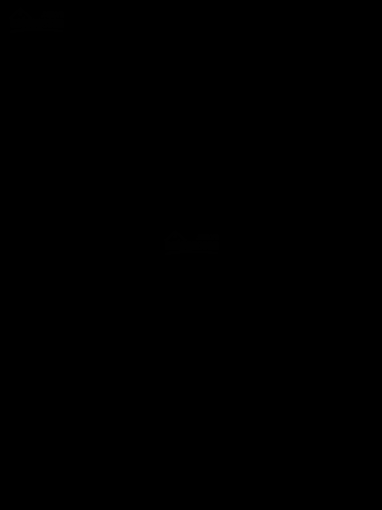

In [23]:
preview_img(annot_train_data)

In [24]:
save_image_from_array(annot_train_data, "../watermark_data/vietnam/annotations/training/batdongsan_1_luq.png")